In [1]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [2]:
merged_results["order"] = merged_results.iloc[:, 4:13].mean(axis=1)
sorted_df = merged_results.sort_values(by='order')

print(sorted_df.head())

    Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
8            8  YALI0_D01353g     TF024             -  -2.73  -2.15  -2.44   
12          12  YALI0_B19602g     TF010          MGF2  -2.41  -1.38   0.00   
79          79  YALI0_E30789g     TF050             -   0.00  -0.52  -1.05   
9            9  YALI0_E31383g     TF051             -  -0.84  -0.45   0.00   
15          15  YALI0_B21582g     TF095          MHY1  -1.15  -0.84   0.00   

    scTlG  HAC_scYFP  OE_inRedStar  OE_normalized_inRedStar  KO_inRedStar  \
8   -2.79      -2.34      0.875994                 0.909160           1.0   
12   0.00       0.00      0.831257                 0.863899           1.0   
79  -1.15       0.00      0.928124                 0.945095           1.0   
9   -0.26      -0.49      0.973174                 0.987381           1.0   
15   0.18       0.00      0.918531                 0.913418           1.0   

    KO_normalized_inRedStar     order  
8                       1.0 

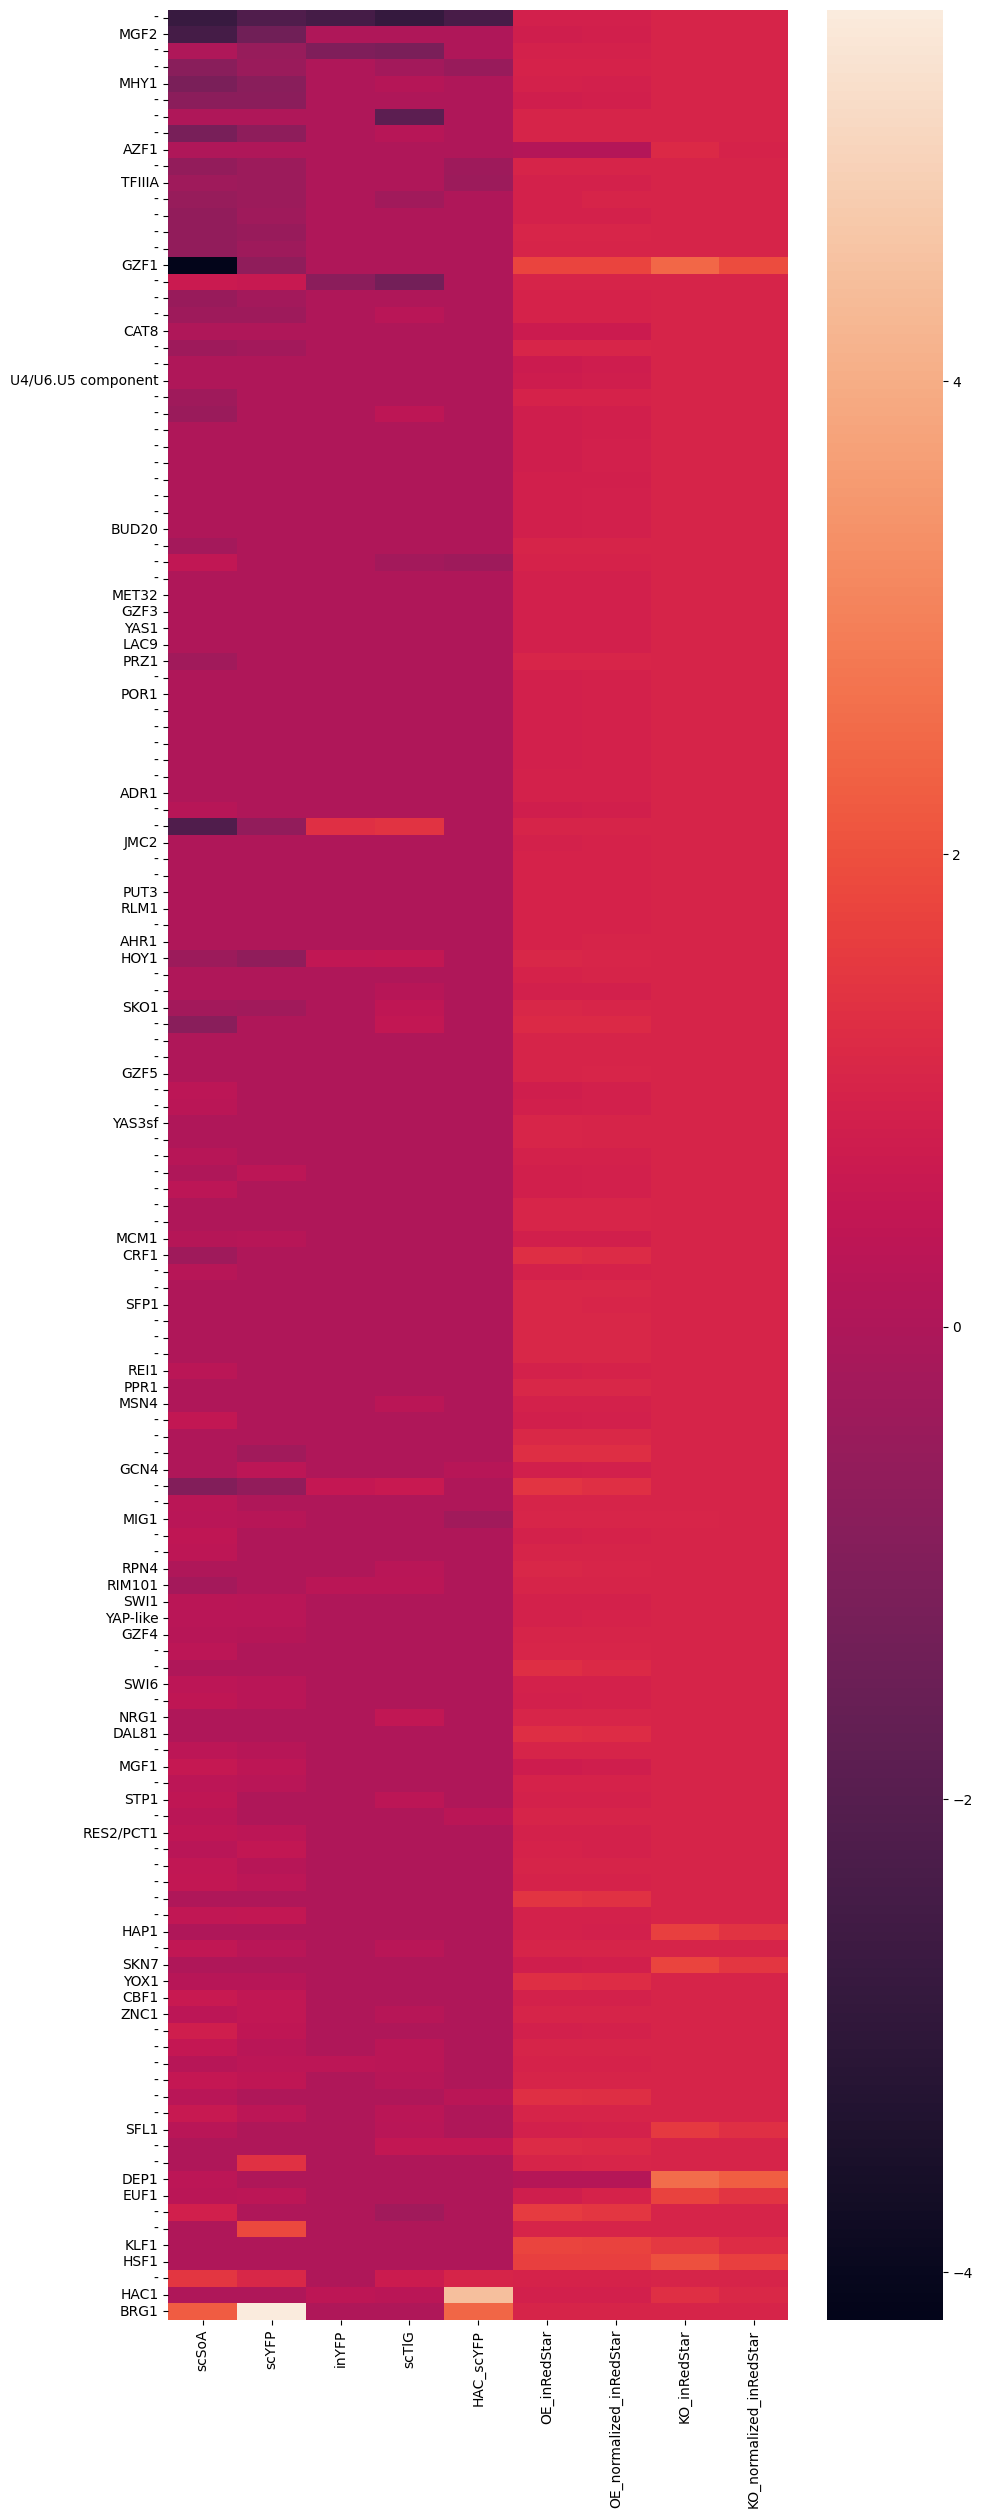

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = sorted_df.iloc[:,4:13]
row_labels = sorted_df['Assigned name']
plt.figure(figsize=(10, 30))
ax = sns.heatmap(numeric_data, yticklabels=row_labels)




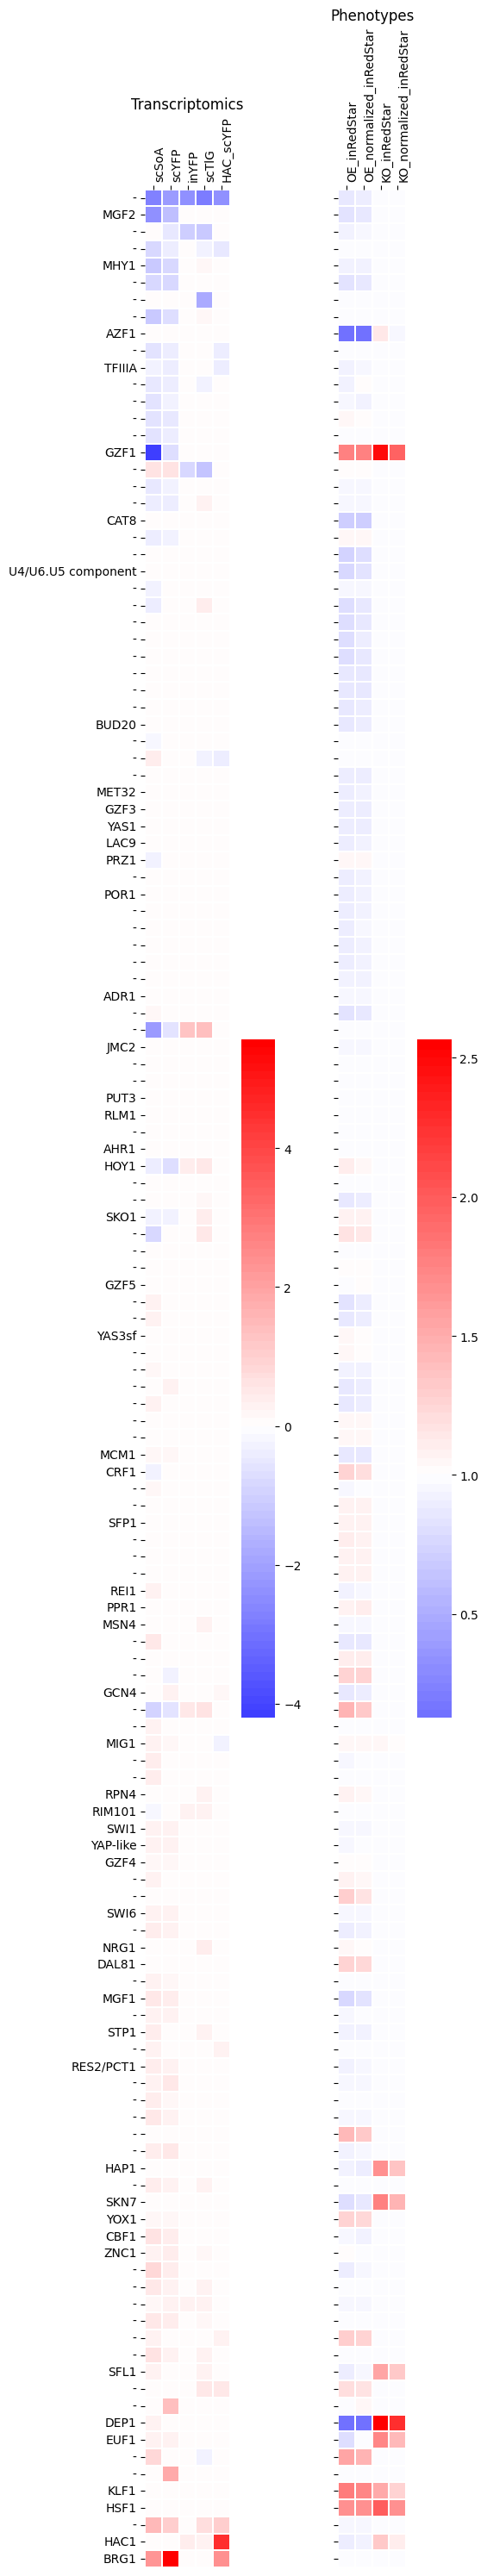

In [4]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 4:9]
numeric_data2 = sorted_df.iloc[:, 9:13]
row_labels = sorted_df['Assigned name']

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 30), sharey=True)

# Plot the first heatmap
sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=True, linewidths=0.05, square=True)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=True, linewidths=0.05, square=True)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()

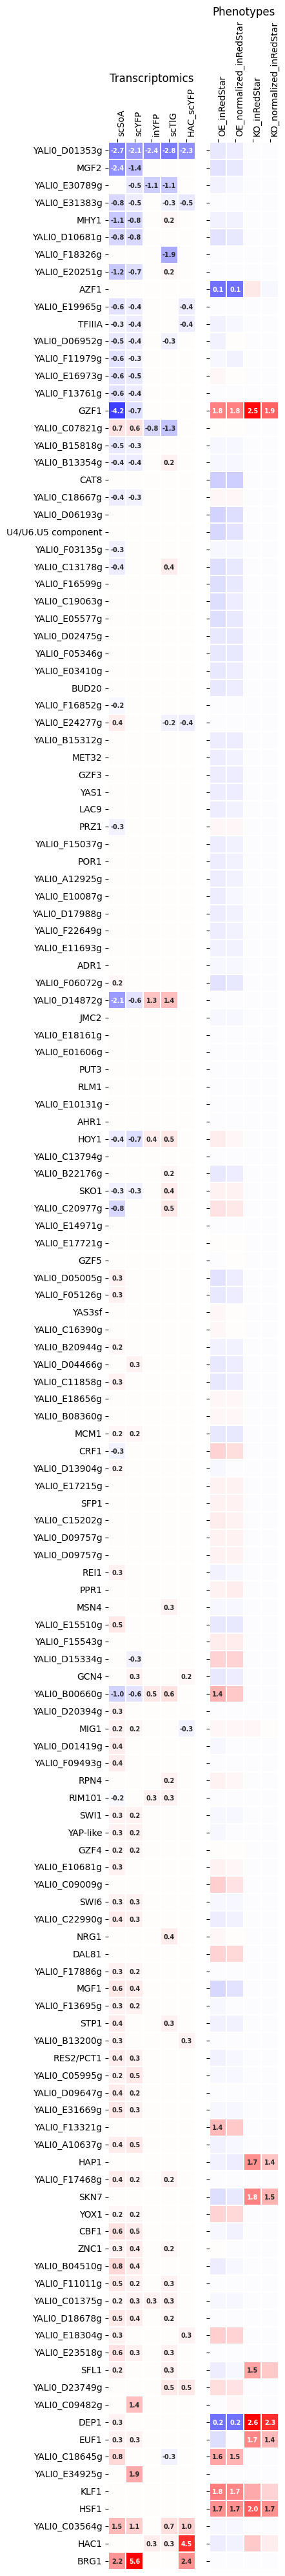

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = sorted_df.iloc[:, 4:9]
numeric_data2 = sorted_df.iloc[:, 9:13]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(sorted_df['Assigned name'], sorted_df['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 40), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_inRedStar': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_normalized_inRedStar': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
    'KO_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128'],
    'KO_normalized_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in sorted_df['TF number'].values:
            annot_data2.loc[sorted_df['TF number'] == gene, column] = numeric_data2.loc[sorted_df['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()
